# Results for the working memory dataset

In [45]:
import os
import numpy as np
import pandas as pd
import nitools as nt
import nibabel as nb
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

from pathlib import Path
from SUITPy import flatmap

import selective_recruitment.plotting as plotting
import selective_recruitment.recruite_ana as ra
import selective_recruitment.globals as gl
import selective_recruitment.scripts.script_prep_sc as ss

import Functional_Fusion.dataset as fdata
import Functional_Fusion.atlas_map as am
import Functional_Fusion.matrix as fmatrix
# import ProbabilisticParcellation.util as putil

from statsmodels.stats.anova import AnovaRM # perform F test
import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting working directory 
# wkdir = '/Volumes/diedrichsen_data$/data/Cerebellum/Demand/selective_recruit'
wkdir = 'A:\data\Cerebellum\CerebellumWorkingMemory\selective_recruit'
if not Path(wkdir).exists():
    wkdir = '/srv/diedrichsen/data/Cerebellum/CerebellumWorkingMemory/selective_recruit'

In [3]:
# Generate the labels and colors for all scatterplot
label_dict={1:'Enc2F', 2:'Ret2F',
            3:'Enc2B', 4:'Ret2B',
            5:'Enc4F', 6:'Ret4F',
            7:'Enc4B', 8:'Ret4B',
            9:'Enc6F', 10:'Ret6F',
            11:'Enc6B',12:'Ret6B',
            13:'rest'}
marker_dict = {1:'o',2:'X',
                3:'o',4:'X',
                5:'o',6:'X',
                7:'o',8:'X',
                9:'o',10:'X',
                11:'o',12:'X',
                13:'s'}
color_dict  = {1:'b',2:'b',
                3:'r',4:'r',
                5:'b',6:'b',
                7:'r',8:'r',
                9:'b',10:'b',
                11:'r',12:'r',
                13:'g'}

# Reliabilities

## Within subject Reliability map for WM dataset

In [4]:
# get data tensor to calculate reliability maps
atlas_cereb, ainfo = am.get_atlas('SUIT3',gl.atlas_dir)
# get reliability for encoding phase
tensor, info, _ = fdata.get_dataset(gl.base_dir,"WMFS",atlas = "SUIT3", sess="ses-02",type='CondRun', info_only=False)

In [64]:
info.columns
info2, c = fdata.agg_data(info, ["phase", "load", "recall", "run"], ["force", "speed", "task_name", "task_num", "sess", "cond_name", "cond_num", "names"], subset=None)
c_load1 = ((info2.phase == 1) & (info2.load == 6))*1 - ((info2.phase == 1) & (info2.load == 2))*1
c_dir1 = ((info2.phase == 1) & (info2.recall == 1))*1 - ((info2.phase == 1) & (info2.recall == 0))*1
c_dir0 = ((info2.phase == 0) & (info2.recall == 1))*1 - ((info2.phase == 0) & (info2.recall == 0))*1

# Z = fmatrix.indicator(c_load1, positive=True)

# B = tensor[0, :, :]
# cB = c_load1@B


(60, 60)

### During encoding

Text(0.5, 1.0, 'reliability encoding')

<Figure size 640x480 with 0 Axes>

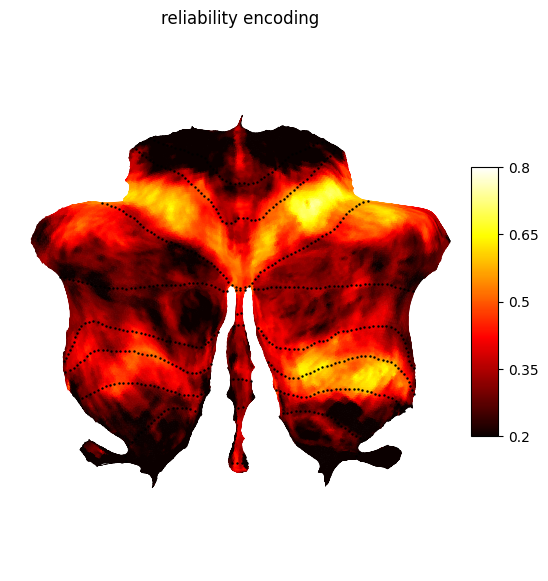

In [5]:
X_enc = tensor[:, info.phase == 0, :]
r_enc = fdata.reliability_within_subj(X_enc, info.run.loc[info.phase == 0], info.cond_num.loc[info.phase == 0],
                                  voxel_wise=True,
                                  subtract_mean=False)

## mean across runs and subjects
r_enc_group = np.nanmean(np.nanmean(r_enc, axis = 1), axis = 0)
img_nii = atlas_cereb.data_to_nifti(r_enc_group)
img_flat = flatmap.vol_to_surf([img_nii], stats='nanmean', space = 'SUIT')
fig = plt.figure()
ax = flatmap.plot(data=img_flat, 
                    render="matplotlib", 
                    cmap = "hot", 
                    colorbar = True, 
                    bordersize = 1.5, 
                    cscale = [0.2, 0.8])
# ax.show()
ax.set_title("reliability encoding")

### During retrieval

Text(0.5, 1.0, 'reliability retrieval')

<Figure size 640x480 with 0 Axes>

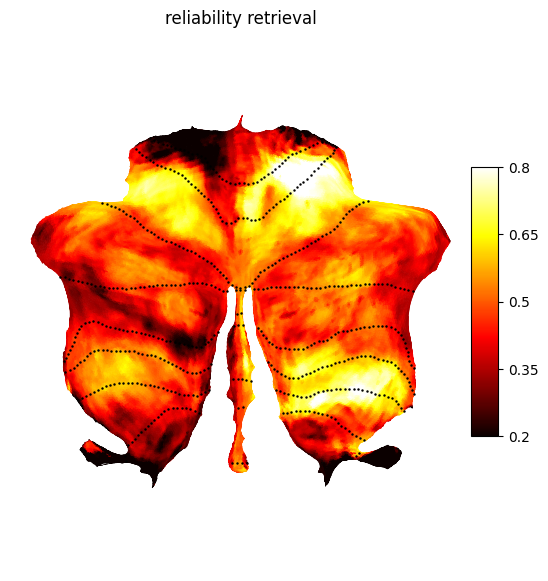

In [6]:
# get reliability for retrieval phase
X_ret = tensor[:, info.phase == 1, :]
r_ret = fdata.reliability_within_subj(X_ret, info.run.loc[info.phase == 1], info.cond_num.loc[info.phase == 1],
                                  voxel_wise=True,
                                  subtract_mean=False)

## mean across runs and subjects
r_ret_group = np.nanmean(np.nanmean(r_ret, axis = 1), axis = 0)
img_nii = atlas_cereb.data_to_nifti(r_ret_group)
img_flat = flatmap.vol_to_surf([img_nii], stats='nanmean', space = 'SUIT')
fig = plt.figure()
ax = flatmap.plot(data=img_flat, 
                    render="matplotlib", 
                    cmap = "hot", 
                    colorbar = True, 
                    bordersize = 1.5, 
                    cscale = [0.2, 0.8])
ax.set_title("reliability retrieval")

## within subject Reliability of conditions

In [ ]:
df = ra.get_reliability_summary(dataset = "WMFS", ses_id = "ses-02", subtract_mean = True) 

In [ ]:
sns.barplot(data = df, x = "cond_name", y = "R")
plt.xticks(rotation = 30)

# checking reliabilities per condition per subjecy
fig, axes = plt.subplots(2,1, figsize=(8, 8), sharey="col", sharex="col")
sns.scatterplot(data = df.loc[df.atlas == "SUIT3"],
                x = "sn", y = "R", 
                hue = "recall", 
                style = "load", 
                ax = axes[0])
axes[0].axhline(y = 0,color = 'k', linestyle = '--')
plt.xticks(rotation=45)
axes[0].set_title("SUIT3")
axes[0].legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


sns.scatterplot(data = df.loc[df.atlas == "fs32k"],
                x = "sn", y = "R", 
                hue = "recall", 
                style = "phase",
                legend = False,  
                ax = axes[1])
axes[1].axhline(y = 0,color = 'k', linestyle = '--')
plt.xticks(rotation=45)
axes[1].set_title("fs32k")

## Between subject reliability

### During encoding

Text(0.5, 1.0, 'between subject reliability encoding')

<Figure size 640x480 with 0 Axes>

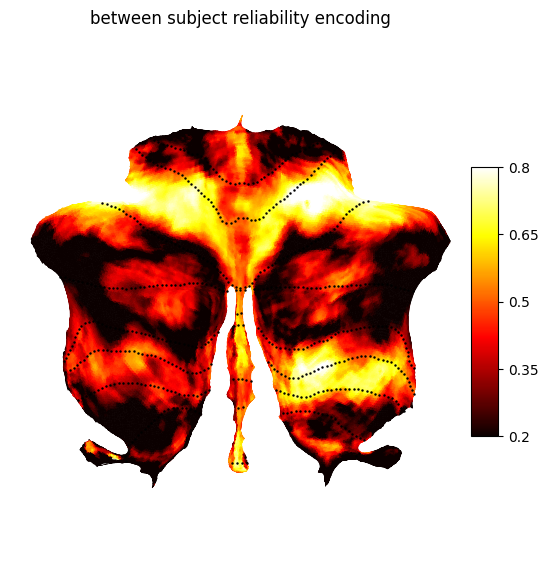

In [10]:
Xb_enc = tensor[:, info.phase == 0, :]
rb_enc = fdata.reliability_between_subj(X_enc, cond_vec=info.cond_num.loc[info.phase == 0],
                                        voxel_wise=True,
                                        subtract_mean=False)
## mean across subjects
rb_enc_group = np.nanmean(rb_enc, axis = 0)
img_nii = atlas_cereb.data_to_nifti(rb_enc_group)
img_flat = flatmap.vol_to_surf([img_nii], stats='nanmean', space = 'SUIT')
fig = plt.figure()
ax = flatmap.plot(data=img_flat, 
                    render="matplotlib", 
                    cmap = "hot", 
                    colorbar = True, 
                    bordersize = 1.5, 
                    cscale = [0.2, 0.8])
# ax.show()
ax.set_title("between subject reliability encoding")

### During retrieval

Text(0.5, 1.0, 'between subject reliability retrieval')

<Figure size 640x480 with 0 Axes>

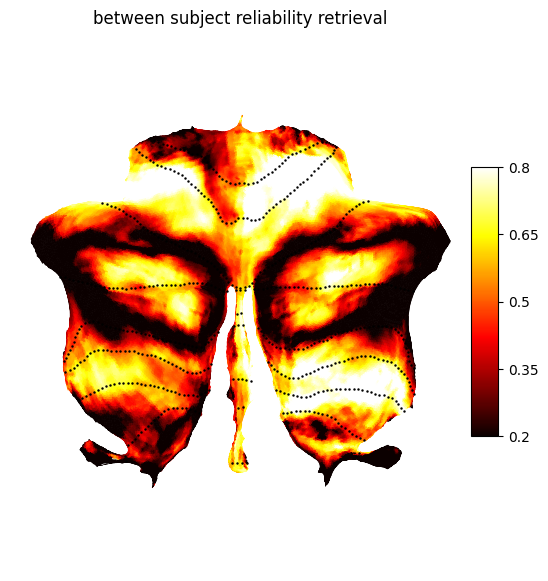

In [12]:
Xb_ret = tensor[:, info.phase == 1, :]
rb_ret = fdata.reliability_between_subj(Xb_ret, cond_vec=info.cond_num.loc[info.phase == 1],
                                        voxel_wise=True,
                                        subtract_mean=False)
## mean across subjects
rb_ret_group = np.nanmean(rb_ret, axis = 0)
img_nii = atlas_cereb.data_to_nifti(rb_ret_group)
img_flat = flatmap.vol_to_surf([img_nii], stats='nanmean', space = 'SUIT')
fig = plt.figure()
ax = flatmap.plot(data=img_flat, 
                    render="matplotlib", 
                    cmap = "hot", 
                    colorbar = True, 
                    bordersize = 1.5, 
                    cscale = [0.2, 0.8])
# ax.show()
ax.set_title("between subject reliability retrieval")

## 1. Scatterplot using regression

### 1.1 Over the whole cerebellum and cortex

Prepare data and run regression 
This way the functions are universal across projects, and it transparent where 
the files / ROIs come from and how the tsv-file is produced. 

Given that get_summary and run_regress are shared basic functions, 
the loading saving of files is done outside of the functions - makes things clearer

In [ ]:
# D = ra.get_summary(dataset = "WMFS", 
#                 ses_id = 'ses-02', 
#                 type = "CondAll")
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(wkdir + '/ROI_all_reg.tsv',sep='\t')

In [ ]:
df_path = os.path.join(wkdir, "ROI_all_reg.tsv")
df1 = pd.read_csv(df_path, sep="\t")
plotting.make_scatterplot(df1,split='cond_num',
            labels=label_dict,
            markers=marker_dict,
            colors=color_dict)

Figure 1. Scatterplot showing average cerebellar activation in each condition vs the corresponding average activation in the cortex. The linear fit is shown in grey. Error bars represent the 95% confidence interval on the residuals of the linear regression fit (within each subject). 

<font color = 'grey'> Do F-test (repeated measures ANOVA)

In [ ]:
# need to pass 
print(AnovaRM(data=df1[df1.cond_name!='rest'], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

### 1.2 Over region of interests
TO BE IMPLEMENTED for cortical and cerebellar rois

### 1.3 Using connectivity models
Connectivity weights will be used to make predictions for a specific ROI 

<font color = 'grey'> Model trained on MDTB, tested on MDTB:<br>

#### 1.3.1 MDTB10 parcellation

In [ ]:
# D = ss.get_summary_conn(dataset = "WMFS", 
#                     ses_id = 'ses-02', 
#                     type = "CondHalf", 
#                     cerebellum_roi ='MDTB10', 
#                     cortex_roi = "Icosahedron1002",
#                     add_rest = True)
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(wkdir + '/ROI_MDTB10_conn_reg.tsv',sep='\t')

In [ ]:
df_path = os.path.join(wkdir, "ROI_MDTB10_conn_reg.tsv")
df3 = pd.read_csv(df_path, sep="\t")

In [ ]:
parcellation = "MDTB10"
roi_name = "Region2"
ax, roi_num = plotting.plot_parcellation(parcellation, roi_name)
# ax.show()
plotting.make_scatterplot(df3.loc[df3.roi == roi_num],split='cond_num',
            labels=label_dict,
            markers=marker_dict,
            colors=color_dict)

plt.xlabel("predicted cerebellar activation")

In [ ]:
print(AnovaRM(data=df3[df3.cond_name!='rest'][df3.roi == roi_num], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

#### 1.3.1 Hierarchical symmetric parcellation (32 parcels)

In [ ]:
# D = ss.get_summary_conn(dataset = "WMFS", 
#                     ses_id = 'ses-02', 
#                     type = "CondHalf", 
#                     cerebellum_roi ='NettekovenSym68c32', 
#                     cortex_roi = "Icosahedron1002",
#                     add_rest = True)
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(wkdir + '/ROI_NettekovenSym68c32_conn_reg.tsv',sep='\t')

In [ ]:
df_path = os.path.join(wkdir, "ROI_NettekovenSym68c32_conn_reg.tsv")
df4 = pd.read_csv(df_path, sep="\t")

In [ ]:
# select an roi to make the plot
parcellation = "NettekovenSym68c32"
roi_name = "D2R"
ax, roi_num = plotting.plot_parcellation(parcellation, roi_name)
# ax.show()
# create the scatterplot
plotting.make_scatterplot(df4.loc[df4.roi == roi_num],split='cond_num',
            labels=label_dict,
            markers=marker_dict,
            colors=color_dict)
plt.xlabel("predicted cerebellar activation")

In [ ]:
print(AnovaRM(data=df4[df4.cond_name!='rest'][df4.roi == roi_num], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

In [ ]:
print(AnovaRM(data=df4[df4.cond_name!='rest'][df4.roi == roi_num], depvar='res',
              subject='sn', within=['phase', 'load', 'recall'], aggregate_func = np.mean).fit())

#### 1.3.1 Hierarchical symmetric parcellation Anterior-posterior (32 parcels)

In [ ]:
# D = ss.get_summary_conn(dataset = "WMFS", 
#                     ses_id = 'ses-02', 
#                     type = "CondHalf", 
#                     cerebellum_roi ='NettekovenSym68c32AP', 
#                     cortex_roi = "Icosahedron1002",
#                     add_rest = True)
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(wkdir + '/ROI_NettekovenSym68c32AP_conn_reg.tsv',sep='\t')

In [ ]:
df_path = os.path.join(wkdir, "ROI_NettekovenSym68c32AP_conn_reg.tsv")
df44 = pd.read_csv(df_path, sep="\t")

In [ ]:
# select an roi to make the plot
parcellation = "NettekovenSym68c32AP"
roi_name = "D3R_P"
ax, roi_num = plotting.plot_parcellation(parcellation, roi_name)
ax.show()
# create the scatterplot
plotting.make_scatterplot(df44.loc[df44.roi == roi_num],split='cond_num',
            labels=label_dict,
            markers=marker_dict,
            colors=color_dict)
plt.xlabel("predicted cerebellar activation")

In [ ]:
print(AnovaRM(data=df44[df44.cond_name!='rest'][df44.roi == roi_num], depvar='res',
              subject='sn', within=['phase', 'load', 'recall'], aggregate_func = np.mean).fit())

## 2. Scatterplot using pca

### 2.1 Over the whole cerebellum and cortex

In [ ]:
D = ra.get_summary(dataset = "WMFS", 
                ses_id = 'ses-02', 
                type = "CondAll", 
                cerebellum_roi = None, 
                cortex_roi = None,
                add_rest = True)
D = ra.run_pca(D,zero_mean=True)
D.to_csv(wkdir + '/ROI_all_pca.tsv',sep='\t')

In [ ]:
df_path = os.path.join(wkdir, "ROI_all_pca.tsv")
df1 = pd.read_csv(df_path, sep="\t")
plotting.make_scatterplot(df1,split='cond_num',
            labels=label_dict,
            markers=marker_dict,
            colors=color_dict)

In [ ]:
print(AnovaRM(data=df1[df1.cond_name!='rest'], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

### 2.1 Over regions of interest
TO BE IMPLEMENTED

### 2.3 Using connectivity models
Connectivity weights will be used to make predictions for a specific ROI 

In [ ]:
D = ss.get_summary_conn(dataset = "WMFS", 
                    ses_id = 'ses-02', 
                    type = "CondHalf", 
                    cerebellum_roi ='NettekovenSym68c32', 
                    cortex_roi = "Icosahedron-1002_Sym.32k",
                    add_rest = True)
D = ra.run_pca(D,zero_mean=True)
D.to_csv(wkdir + '/ROI_NettekovenSym68c32_conn_pca.tsv',sep='\t')

In [ ]:
df_path = os.path.join(wkdir, "ROI_NettekovenSym68c32_conn_pca.tsv")
df6 = pd.read_csv(df_path, sep="\t")
# df4

In [ ]:
# select an roi to make the plot
parcellation = "NettekovenSym68c32"
roi_name = "D1R"
ax, roi_num = plotting.plot_parcellation(parcellation, roi_name)
# ax.show()
# create the scatterplot
plotting.make_scatterplot(df6.loc[df6.roi == roi_num],split='cond_num',
            labels=label_dict,
            markers=marker_dict,
            colors=color_dict, 
            fit_line = True)
plt.xlabel("predicted cerebellar activation")

In [ ]:
plotting.make_scatterplot(df4.loc[df4.roi == roi_num],split='cond_num',
            labels=label_dict,
            markers=marker_dict,
            colors=color_dict, 
            fit_line = True)

In [ ]:
display(df4.head())
display(df6.head())

In [ ]:
print(AnovaRM(data=df6[df6.cond_name!='rest'][df6.roi == roi_num], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

## 3. Plots of activity profiles

### 2.1 over the whole cerebellum and cortex


In [ ]:
# get the corresponding part of the dataframe
DD = df1.loc[df1.cond_name != 'rest'].copy()
DD["load"] = DD["load"].apply(str)
DD['recall'] = DD['recall'].map({1: 'fw', 0: 'bw'}) 
DD['phase'] = DD['phase'].map({1: 'Ret', 0: 'Enc'}) 

palette = sns.color_palette(["red", "blue", "black"])
sns.catplot(DD, x = "load", y = "Y", hue = "recall", col = "phase", errorbar= 'se', kind = 'point')
sns.catplot(DD, x = "load", y = "X", hue = "recall", col = "phase", errorbar= 'se', kind = 'point')

### 2.2 using the hierarchical parcellation (32 parcels)

In [ ]:
# select an roi to make the plot
parcellation = "NettekovenSym68c32"
roi_name = "S1R"
ax, roi_num = plotting.plot_parcellation(parcellation, roi_name)
ax.show()

# get the corresponding part of the dataframe
DD = df4.loc[df4.cond_name != 'rest'][df4.roi == roi_num].copy()
DD["load"] = DD["load"].apply(str)
DD['recall'] = DD['recall'].map({1: 'fw', 0: 'bw'}) 
DD['phase'] = DD['phase'].map({1: 'Ret', 0: 'Enc'}) 

palette = sns.color_palette(["red", "blue", "black"])
sns.catplot(DD, x = "load", y = "Y", hue = "recall", col = "phase", errorbar= 'se', kind = 'point')
# sns.catplot(DD, x = "load", y = "X", hue = "recall", col = "phase", errorbar= 'se', kind = 'point')

### 2.3 using the hierarchical parcellation divided into anterior and posteriot subregions (63 parcels)

In [ ]:
# select an roi to make the plot
parcellation = "NettekovenSym68c32AP"
roi_name = "M1R_A"
ax, roi_num = plotting.plot_parcellation(parcellation, roi_name)
ax.show()

# get the corresponding part of the dataframe
DD = df44.loc[df44.cond_name != 'rest'][df44.roi == roi_num].copy()
DD["load"] = DD["load"].apply(str)
DD['recall'] = DD['recall'].map({1: 'fw', 0: 'bw'}) 
DD['phase'] = DD['phase'].map({1: 'Ret', 0: 'Enc'}) 

# sns.lineplot(DD, x = "load", y = "Y", hue = "recall", style = "phase")
sns.catplot(DD, x = "load", y = "Y", hue = "recall", col = "phase", errorbar= 'se', kind = 'point')
# sns.catplot(DD, x = "load", y = "X", hue = "recall", col = "phase", errorbar= 'se', kind = 'point')